In [7]:
import numpy as np  # Import Numpy library for numerical operations such as arrays, matrices, etc.
import pandas as pd  # Import Pandas library for data manipulation and analysis
import nltk  # Import the Natural Language Toolkit (NLTK), a suite of libraries for language processing
from nltk.sentiment.vader import SentimentIntensityAnalyzer  # Import VADER, a part of NLTK for sentiment analysis
import re  # Import Python's regular expression library for string searching and manipulation
from textblob import TextBlob  # Import TextBlob for simplified text processing and sentiment analysis
from wordcloud import WordCloud  # Import WordCloud for generating a visual representation of text data
import seaborn as sns  # Import Seaborn for data visualization (statistical graphics)
import matplotlib.pyplot as plt  # Import matplotlib's pyplot for plotting graphs
import cufflinks as cf  # Import Cufflinks to bind Plotly directly to pandas dataframes
%matplotlib inline  
from plotly.offline import init_notebook_mode, iplot  # Import Plotly's functions for offline plotting in notebooks
init_notebook_mode(connected=True)  # Initialize Plotly's notebook mode for interactive plots
cf.go_offline()  # Enable Plotly cufflinks to work offline
import plotly.graph_objs as go  # Import Plotly's graph objects for making custom plots
from plotly.subplots import make_subplots  # Import function to create subplots with Plotly

import warnings  # Import Python's warnings module to control warning messages
warnings.filterwarnings("ignore")  # Ignore all warnings
warnings.warn("this will not show")  # Example warning that will be ignored

pd.set_option('display.max_columns', None)  # Configure pandas to display all columns of a dataframe


In [12]:
df = pd.read_csv("Amazondataset.csv") # Load the dataset from a CSV file named 'Amazondataset.csv' located in the current working directory

In [14]:
df.head() # Display the first five rows of the DataFrame to quickly check the data's structure and sample

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [15]:
df # To view full dataset

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1,I bought this Sandisk 16GB Class 10 to use wit...,23-07-2013,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5,Used this for extending the capabilities of my...,22-08-2013,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5,Great card that is very fast and reliable. It ...,31-03-2014,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5,Good amount of space for the stuff I want to d...,16-09-2013,448,0,0,0,0,0.0,0.0


In [16]:
df = df.sort_values("wilson_lower_bound", ascending = False) # Sort DataFrame by 'wilson_lower_bound' in descending order
df.drop('Unnamed: 0', inplace = True, axis = 1) # Remove the unnecessary 'Unnamed: 0' column from the DataFrame
df.head() # Display the first five rows of the modified DataFrame to verify changes

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
2031,"Hyoun Kim ""Faluzure""",5,[[ UPDATE - 6/19/2014 ]]So my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544
3449,NLee the Engineer,5,I have tested dozens of SDHC and micro-SDHC ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519
4212,SkincareCEO,1,NOTE: please read the last update (scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139
317,"Amazon Customer ""Kelly""",1,"If your card gets hot enough to be painful, it...",09-02-2012,1033,422,73,495,349,0.852525,0.818577
4672,Twister,5,Sandisk announcement of the first 128GB micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109


In [24]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]  # List columns with missing values
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)  # Count missing values and sort ascending
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)  # Calculate missing value ratio and sort
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])  # Create summary DataFrame
    missing_df = pd.DataFrame(missing_df)  # Ensure the result is a DataFrame
    return missing_df  # Return the DataFrame with missing value analysis

def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))  # Print section header for DataFrame shape
    print("Rows: {}".format(df.shape[0]))  # Print number of rows
    print("Columns: {}".format(df.shape[1]))  # Print number of columns
    print("TYPES".center(82, '~'))  # Print section header for data types
    print(df.dtypes)  # Print data types of the DataFrame
    print("".center(82, '~'))  # Print separator
    print(missing_values_analysis(df))  # Perform and print missing values analysis
    print('DUPLICATED VALUES'.center(83, '~'))  # Print section header for duplicated values
    print(df.duplicated().sum())  # Print number of duplicated rows
    print("QUANTILES".center(82, '~'))  # Print section header for quantiles
    numeric_cols = df.select_dtypes(include=[np.number])  # Select only numeric columns for quantile calculation
    if not numeric_cols.empty:
        print(numeric_cols.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)  # Print quantiles of numeric columns
    else:
        print("No numeric columns to display quantiles.")

check_dataframe(df)  # Call the function to check the DataFrame 'df'


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 4915
Columns: 11
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
reviewerName             object
overall                   int64
reviewText               object
reviewTime               object
day_diff                  int64
helpful_yes               int64
helpful_no                int64
total_vote                int64
score_pos_neg_diff        int64
score_average_rating    float64
wilson_lower_bound      float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
              Missing Values  Ratio
reviewerName               1   0.02
reviewText                 1   0.02
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~DUPLICATED VALUES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~QUANTILES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
                       0.00  0.05   0.50        0.95       0.99         1.00
overall 

In [27]:
def check_class(dataframe):
    # Create a DataFrame with column names and their corresponding number of unique values
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                               'Classes': [dataframe[i].nunique() for i in dataframe.columns]})
    
    # Sort the DataFrame based on the number of unique values in descending order
    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    
    # Reset the index of the DataFrame to make it tidy after sorting
    nunique_df = nunique_df.reset_index(drop=True)
    
    # Return the processed DataFrame
    return nunique_df

# Call the function with the DataFrame 'df' to display the number of unique values per column
check_class(df)


,Variable,Classes
0,reviewText,4912
1,reviewerName,4594
2,reviewTime,690
3,day_diff,690
4,wilson_lower_bound,40
5,score_average_rating,28
6,score_pos_neg_diff,27
7,total_vote,26
8,helpful_yes,23
9,helpful_no,17


In [39]:
constraints = ['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#EB0CD5']

def categorical_variable_summary(df, column_name):
    # Initialize the subplot
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{"type": "xy"}, {"type": "domain"}]])
    
    # Add a bar trace for countplot
    fig.add_trace(
        go.Bar(
            y=df[column_name].value_counts().values.tolist(),
            x=[str(i) for i in df[column_name].value_counts().index],
            text=df[column_name].value_counts().values.tolist(),
            textfont=dict(size=14),
            name=column_name,
            textposition='auto',
            showlegend=False,
            marker=dict(color=constraints,
                        line=dict(color='#DBE6EC', width=1))
        ),
        row=1, col=1
    )

    # Add a pie chart trace for percentages
    fig.add_trace(
        go.Pie(
            labels=df[column_name].value_counts().keys(),
            values=df[column_name].value_counts().values,  # Corrected to remove the callable error
            textfont=dict(size=14),
            textposition='auto',
            showlegend=False,
            name=column_name,
            marker=dict(colors=constraints)
        ),
        row=1, col=2
    )

    # Update layout
    fig.update_layout(
        title={
            'text': column_name,
            'y': 0.9,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        template='plotly_white'
    )

    # Display the figure
    iplot(fig)


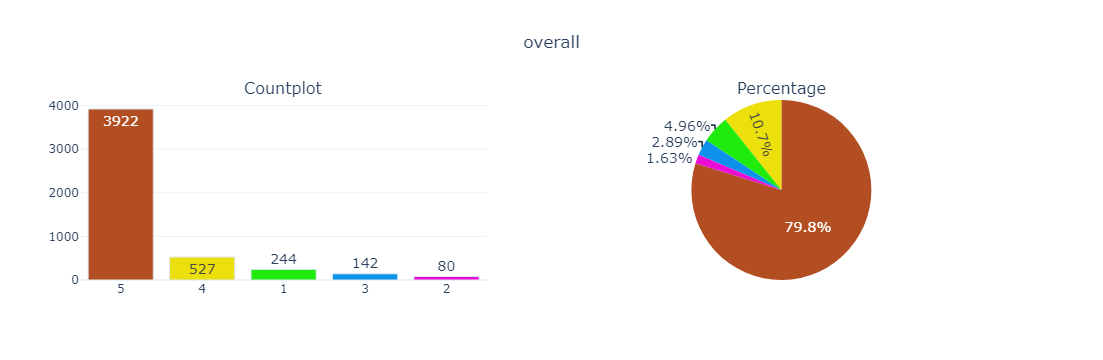

In [42]:
categorical_variable_summary(df,'overall')

In [66]:
df.reviewText.head()

2031       update               so my lovely wife boug...
3449    i have tested dozens of sdhc and micro sdhc ca...
4212    note   please read the last update  scroll to ...
317     if your card gets hot enough to be painful  it...
4672    sandisk announcement of the first    gb micro ...
Name: reviewText, dtype: object

In [67]:
review_example = df.reviewText[2031]
review_example

'   update               so my lovely wife bought me a samsung galaxy tab   for father s day and i ve been loving it ever since   just as other with samsung products  the galaxy tab   has the ability to add a microsd card to expand the memory on the device   since it s been over a year  i decided to do some more research to see if sandisk offered anything new   as of            their product lineup for microsd cards from worst to best  performance wise  are the as follows sandisksandisk ultrasandisk ultra plussandisk extremesandisk extreme plussandisk extreme pronow  the difference between all of these cards are simply the speed in which you can read write data to the card   yes  the published rating of most all these cards  except the sandisk regular  are class    uhs i but that s just a rating    actual real world performance does get better with each model  but with faster cards come more expensive prices   since amazon doesn t carry the ultra plus model of microsd card  i had to do

In [68]:
review_example = re.sub("[^a-zA-Z]",'',review_example)
review_example

'updatesomylovelywifeboughtmeasamsunggalaxytabforfathersdayandivebeenlovingiteversincejustasotherwithsamsungproductsthegalaxytabhastheabilitytoaddamicrosdcardtoexpandthememoryonthedevicesinceitsbeenoverayearidecidedtodosomemoreresearchtoseeifsandiskofferedanythingnewasoftheirproductlineupformicrosdcardsfromworsttobestperformancewisearetheasfollowssandisksandiskultrasandiskultraplussandiskextremesandiskextremeplussandiskextremepronowthedifferencebetweenallofthesecardsaresimplythespeedinwhichyoucanreadwritedatatothecardyesthepublishedratingofmostallthesecardsexceptthesandiskregularareclassuhsibutthatsjustaratingactualrealworldperformancedoesgetbetterwitheachmodelbutwithfastercardscomemoreexpensivepricessinceamazondoesntcarrytheultraplusmodelofmicrosdcardihadtododirectcomparisonsbetweenthesandiskultraextremeandextremeplusasmentionedinmyearlierreviewipurchasedthesandiskultraformygalaxysmyquestionwasdidiwanttopayovermoreforacardthatisfasterthantheoneialreadyownedoricouldpayalmostdoubletoget

In [69]:
review_example = review_example.lower().split()
review_example

['updatesomylovelywifeboughtmeasamsunggalaxytabforfathersdayandivebeenlovingiteversincejustasotherwithsamsungproductsthegalaxytabhastheabilitytoaddamicrosdcardtoexpandthememoryonthedevicesinceitsbeenoverayearidecidedtodosomemoreresearchtoseeifsandiskofferedanythingnewasoftheirproductlineupformicrosdcardsfromworsttobestperformancewisearetheasfollowssandisksandiskultrasandiskultraplussandiskextremesandiskextremeplussandiskextremepronowthedifferencebetweenallofthesecardsaresimplythespeedinwhichyoucanreadwritedatatothecardyesthepublishedratingofmostallthesecardsexceptthesandiskregularareclassuhsibutthatsjustaratingactualrealworldperformancedoesgetbetterwitheachmodelbutwithfastercardscomemoreexpensivepricessinceamazondoesntcarrytheultraplusmodelofmicrosdcardihadtododirectcomparisonsbetweenthesandiskultraextremeandextremeplusasmentionedinmyearlierreviewipurchasedthesandiskultraformygalaxysmyquestionwasdidiwanttopayovermoreforacardthatisfasterthantheoneialreadyownedoricouldpayalmostdoubletoge

In [70]:
rt = lambda x: re.sub("[^a-zA-Z]", ' ',str(x))
df["reviewText"]=df["reviewText"].map(rt)
df["reviewText"]=df["reviewText"].str.lower()
df.head()

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment,final_sentiment
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,"{'neg': 0.031, 'neu': 0.859, 'pos': 0.111, 'co...",Positive
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,"{'neg': 0.023, 'neu': 0.89, 'pos': 0.087, 'com...",Positive
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,"{'neg': 0.046, 'neu': 0.807, 'pos': 0.147, 'co...",Positive
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,"{'neg': 0.038, 'neu': 0.885, 'pos': 0.076, 'co...",Positive
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,"{'neg': 0.029, 'neu': 0.839, 'pos': 0.132, 'co...",Positive


In [77]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import pandas as pd

# Assuming df['reviewText'] contains textual reviews
# Applying TextBlob to each text entry for sentiment analysis
df[['polarity', 'subjectivity']] = df['reviewText'].apply(
    lambda Text: pd.Series(TextBlob(Text).sentiment)
)

# Initialize the SentimentIntensityAnalyzer once
analyzer = SentimentIntensityAnalyzer()

# Iterating over each review in the DataFrame
for index, text in df['reviewText'].items():
    # Obtain the polarity scores from VADER for the text
    score = analyzer.polarity_scores(text)

    # Extract the negative, neutral, and positive scores
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']

    # Determine the final sentiment based on the scores
    if neg > pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "Neutral"


In [78]:
df[df['sentiment']=='Positive'].sort_values("wilson_lower_bound",
                                            ascending = False).head(5)

,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound,polarity,subjectivity,sentiment,final_sentiment
2031,"Hyoun Kim ""Faluzure""",5,update so my lovely wife boug...,05-01-2013,702,1952,68,2020,1884,0.966337,0.957544,0.163859,0.562259,Positive,Positive
3449,NLee the Engineer,5,i have tested dozens of sdhc and micro sdhc ca...,26-09-2012,803,1428,77,1505,1351,0.948837,0.936519,0.103870,0.516435,Positive,Positive
4212,SkincareCEO,1,note please read the last update scroll to ...,08-05-2013,579,1568,126,1694,1442,0.925620,0.912139,0.212251,0.505394,Positive,Positive
317,"Amazon Customer ""Kelly""",1,if your card gets hot enough to be painful it...,09-02-2012,1033,422,73,495,349,0.852525,0.818577,0.143519,0.494207,Positive,Positive
4672,Twister,5,sandisk announcement of the first gb micro ...,03-07-2014,158,45,4,49,41,0.918367,0.808109,0.172332,0.511282,Positive,Positive


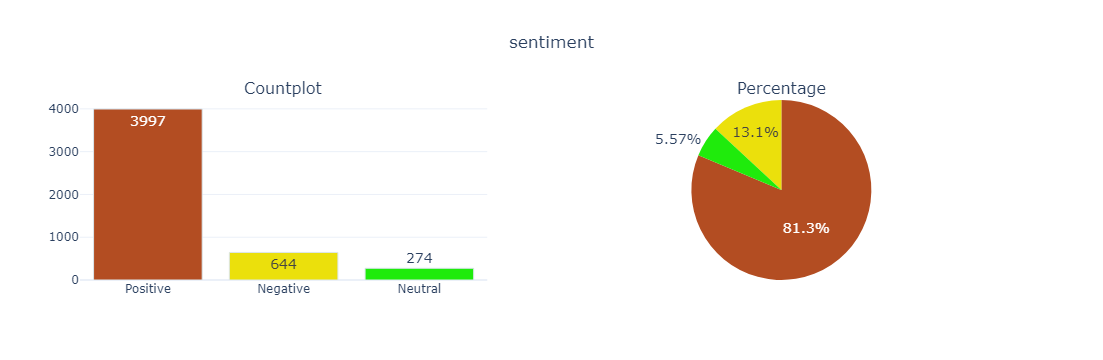

In [79]:
categorical_variable_summary(df,'sentiment')